In [1]:
# Import required libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole  # For molecule visualization in Jupyter
from rdkit import RDLogger
from rdkit.Chem import AllChem as Chem  # RDKit's main chemistry toolkit
from rdkit.Chem import Descriptors as rdescriptors  # For molecular descriptors
from rdkit.Chem import Descriptors, Lipinski, Crippen, Draw
import csv


In [2]:
# Configure RDKit logging
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)  # Set logging level to CRITICAL to minimize output

# Load molecular structures from SDF file
Chem.SDMolSupplier('../data/drugbank.sdf')

with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

In [3]:
def lead_rule_of_three(suppl):
    lipinski_passed = []

    for mol in suppl:
        if mol:  # Ensure molecule is valid
            rules = [
                Lipinski.NumHAcceptors(mol) <= 10,
                Lipinski.NumHDonors(mol) <= 5,
                Descriptors.MolWt(mol) < 300,
                Crippen.MolLogP(mol) <= 5
            ]
            if sum(rules) >= 3:  # At least 3 out of 4 rules must be satisfied
                lipinski_passed.append(mol)

    return lipinski_passed  # Return the list of molecules that pass the rule

In [4]:
mol = Chem.MolFromSmiles("c1ccccc1CCCCCc1ccccc1")

In [5]:
patt = Chem.MolFromSmiles("c1ccccc1C")

In [6]:
patt2 = Chem.MolFromSmiles("c1ccccc1")

In [7]:
asp_patt = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")

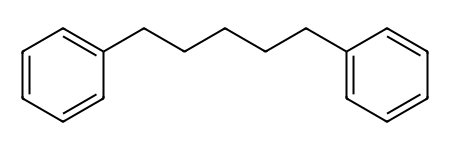

In [8]:
mol

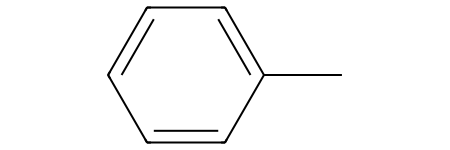

In [9]:
patt

In [10]:
mol.HasSubstructMatch(patt)

True

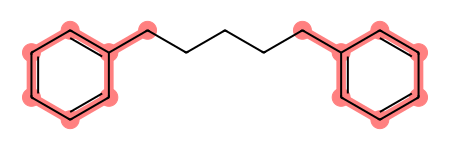

In [11]:
mol.GetSubstructMatches(patt)
mol

In [12]:
sum([int(mol.HasSubstructMatch(patt)) for mol in drugs]), sum([int(mol.HasSubstructMatch(patt2)) for mol in drugs])

(3458, 4288)

In [13]:
aspirin_like = [mol for mol in drugs if mol.HasSubstructMatch(asp_patt)]

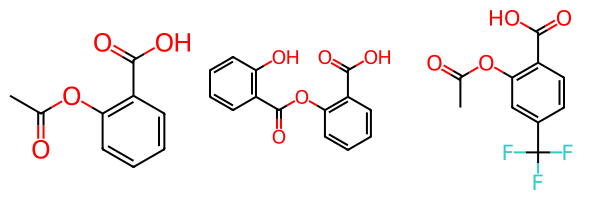

In [17]:
Draw.MolsToImage(aspirin_like)